<a href="https://colab.research.google.com/github/SophiaScheveck/Math311_LinearAlgebraProjects/blob/main/Copy_of_The_Ski_Hill_Transition_Matrices_and_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialize the preliminary code:


In [1]:
import numpy as np
from numpy import c_

ll = "loaded"

The local downhill ski organization wants to know the usage rate for their four different ski runs. A consultant watched skiers one morning and tracked where they went after each run from the Bunny hill, Green triangle, Double black diamon, and Mogul runs. The information is summarized below:

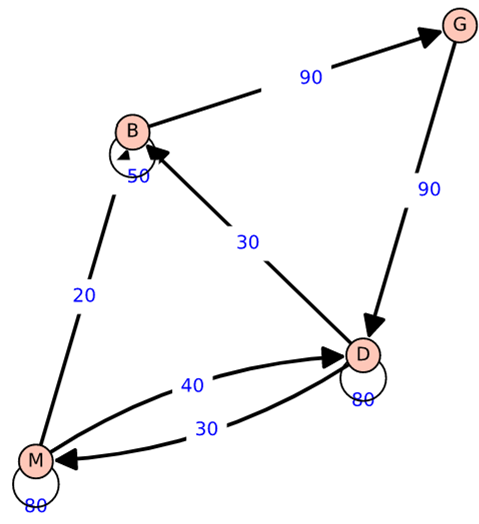

The Chalet wants to put up advertising targeting the most number of skiers for their daily lunch special. Using the information above, develop a model that tracks skiers on the runs during the day.

Note: The data was collected on a Monday morning, a day when not very many people are skiing. There are usually 980 skiers who leave the Chalet and start at the bunny hill on a typical weekend morning.

# Prepare a model

We construct a matrix equation model $$ M x_0 = x_1 $$ for the system. Although there were 140 people on the bunny hill when the data was collected, assume there were 980 skiers that start at the bunny hill.

In [2]:
# create the matrix M:
M = np.matrix([[50/140, 0/90, 30/140, 20/140],
               [90/140, 0/90, 0/140, 0/140],
               [0/140, 90/90, 80/140, 40/140],
               [0/140, 0/90, 30/140, 80/140]])
M

matrix([[0.35714286, 0.        , 0.21428571, 0.14285714],
        [0.64285714, 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.57142857, 0.28571429],
        [0.        , 0.        , 0.21428571, 0.57142857]])

In [3]:
x0 = np.matrix([[980], [0], [0], [0]])
x0

matrix([[980],
        [  0],
        [  0],
        [  0]])

In [4]:
M*x0


matrix([[350.],
        [630.],
        [  0.],
        [  0.]])

#Question #5:
Assume 980 skiers start skiing at 8:00am on a Saturday.  All skiers must start on the Bunny Hill, so we coudl represent this as a vector  (e.g. $$ \vec{x}_0 = \left( \begin{array}{c} 980 \\ 0 \\ 0 \\ 0 \\ \end{array} \right) $$

Modify the code below to determine where skiers go on the following runs:

Run                  | Run 0 | Run 1 | Run 2 | Run 3 | Run 4 | Run 5 | Run 10 | Run 15
---                  |  ---  |---   |  ---  |  ---  |  ---  |  ---  |   ---  |   ---
Bunny Hill           |  980  |       |       |       |       |       |        |       
Green Triangle       |   0   |       |       |       |       |       |        |     
Double Black Diamond |   0   |       |       |       |       |       |        |
Moguls               |   0   |       |       |       |       |       |        |




In [5]:
# Compute where skiers are after one ski run:

M*x0

matrix([[350.],
        [630.],
        [  0.],
        [  0.]])

In [10]:
#  We can take powers of M using the ** operator.

#  So, M**2  * x0 is the same as  M * M * x0

M ** 15  * x0

matrix([[195.30244202],
        [125.55205948],
        [439.4323341 ],
        [219.7131644 ]])

In [7]:
#  The initial state of the system:
x0 = np.matrix([[980], [0], [0], [0]])

#Make a matrix, where each column is the result
#of applying the matrix multiple times to the initial state x0:

X = np.c_[x0, M*x0, M**2 * x0, M**3 * x0, M**4 * x0, M**5 * x0, M**10 * x0, M**15 * x0]

#print out the X matrix, rounding the entries to 2 decimal places
print(X.round(2))


[[980.   350.   125.   179.64 208.8  200.62 195.31 195.3 ]
 [  0.   630.   225.    80.36 115.48 134.23 125.64 125.55]
 [  0.     0.   630.   585.   453.21 432.32 439.48 439.43]
 [  0.     0.     0.   135.   202.5  212.83 219.57 219.71]]


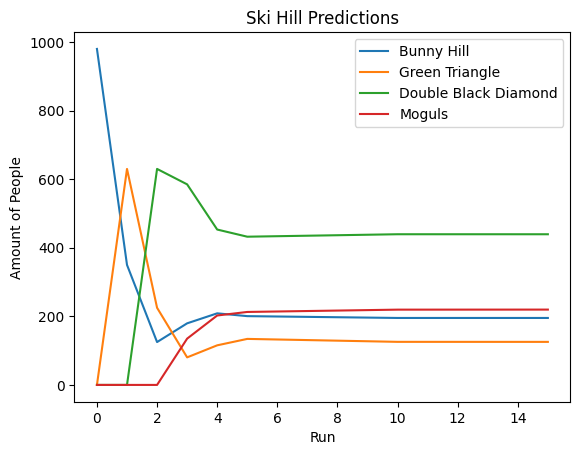

In [13]:
import matplotlib.pyplot as plt

x  = [0, 1, 2, 3, 4, 5, 10, 15]
plt.plot(x, np.array(X[0])[0], label="Bunny Hill")
plt.plot(x, np.array(X[1])[0], label="Green Triangle")
plt.plot(x, np.array(X[2])[0], label="Double Black Diamond")
plt.plot(x, np.array(X[3])[0], label="Moguls")
plt.plot()

plt.xlabel("Run")  # Update this label
plt.ylabel("Amount of People")  # Update this label
plt.title("Ski Hill Predictions")  # Update the title
plt.legend()
plt.show()

# Question 6:

Each ski run and chair lift ride takes approximately 12 minutes.  Where should the Chalet place their billboard to reacch the maximum number of skiers just before lunch?

Insert your code to answer this question.  Be sure to explain your reasoning with your answer in the packet.

In [12]:
M ** 19  * x0

matrix([[195.30249403],
        [125.55161816],
        [439.43064839],
        [219.71523942]])

# Question 7:

Does our answer change if the skiers were able to do one more run in the morning than you had estimated?

Insert your code to answer this question.  Be sure to explain your reasoning with your answer in the packet.


#Homework for Markov Chanins and Skiing

Answer the following two situations on the printed homework.  The questions are copied here for your convenience - but you will turn in your homework pages with your answers written on those pages.

## Situation 1:  

We use the same set-up as the previous ski problem, except that we assume these changes to the initial data used to form matrix $M$:

* After each run, 20 skiers from the Green Triangle head to the Chalet instead of to the Double Black Diamond.
* After each run, 30 skiers from the Double Black Diamond go to the Chalet instead of going back to the Double Black Diamond run.
* On each run, all skiers leaving the lodge go to the Bunny Hill.


## HW 1:

What is your new matrix system for this modification?  Give your new system and explain how you modified your old system to fit this new situation.

## HW 2:

Long term, did changing the system affect which ski run was most popular?

Note:  It may be helpful to copy some of the code from above to answer this question.

# Situation 2:  

People who enter the ski lodge don't return immediately to the Bunny Hill. Instead, they get hot chocolate and sit for, in effect, 3 ski runs. In this situation, where do most people spend their time during a day of skiing?

## HW 3:  

What is your new matrix system for this modification?  Give your new system and explain how you modified your old system to fit this new situation.

## HW 4:

Long term, did changing the system affect which ski run was most popular?

# Situation 3:

## Markov Chains and Transformation Matrix Project:

Copy and modify examples of the code above to model the scenario described in the packet.

Provide a 1-page executive summary of this situation described in the packet.  It should be written with complete sentences and include:

  1.	The posed problem
  2.	A description of the matrix
  3.	An example showing the initial state, the first, and the second state of the system.
  4.	A graph showing how the system evolves over time
  5.	A conclusion about the long-term trend of the system.
